In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers = pd.read_csv(r'C:\Users\DELL\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\DELL\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\DELL\Downloads\Transactions.csv')


In [3]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [4]:
# EDA: Overview of data
print(customers.head())
print(products.head())
print(transactions.head())

# Basic stats for numerical columns
print(transactions.describe())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272   

In [5]:
# Merge datasets for a consolidated view
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# EDA: Overview of data
print(merged.head())

# Basic stats for numerical columns
print(merged.describe())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

C:\Users\DELL\AppData\Local\Temp\ipykernel_4300\2535108845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index, palette='viridis')


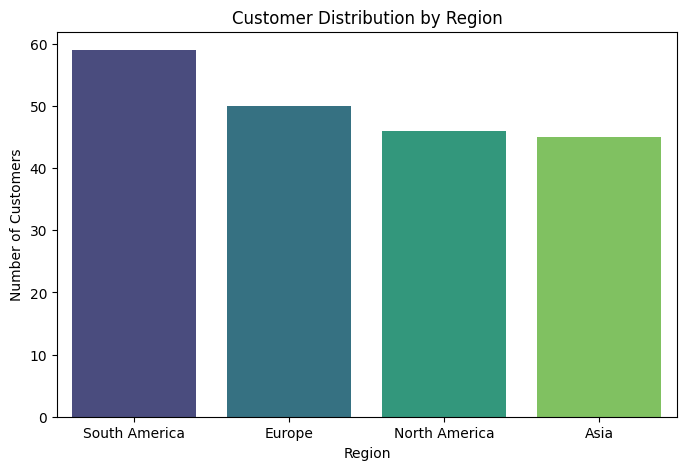

In [6]:
# 1. Region-wise customer distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index, palette='viridis')
plt.title('Customer Distribution by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4300\142241547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', order=products['Category'].value_counts().index, palette='coolwarm')


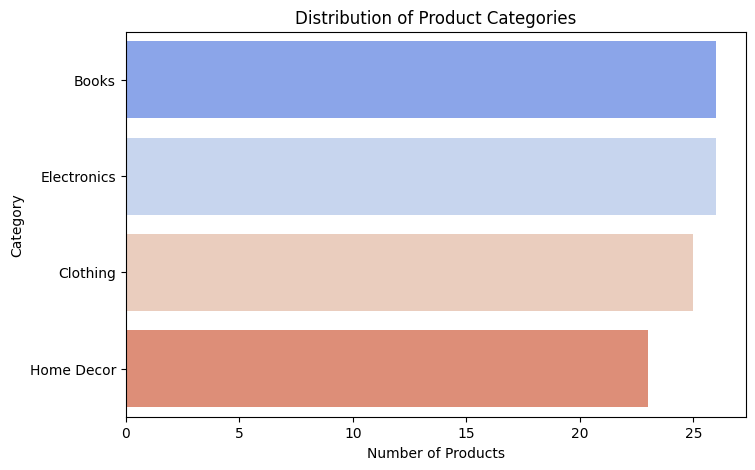

In [7]:
# 2. Product category distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=products, y='Category', order=products['Category'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Product Categories')
plt.ylabel('Category')
plt.xlabel('Number of Products')
plt.show()

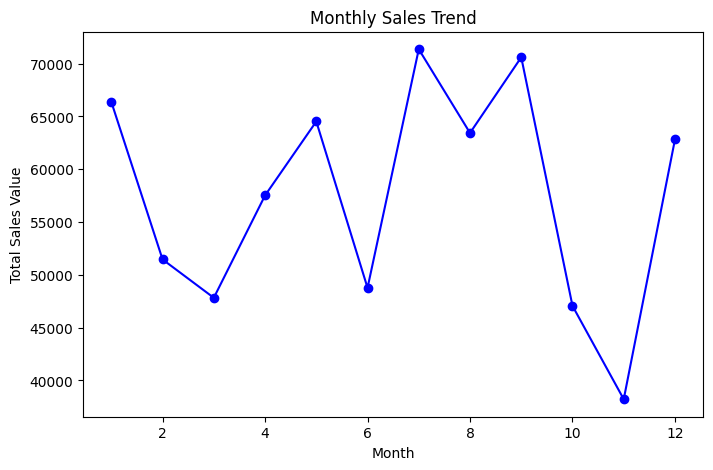

In [8]:
# 3. Monthly sales trends
merged['Month'] = merged['TransactionDate'].dt.month
monthly_sales = merged.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales Value')
plt.xlabel('Month')
plt.show()

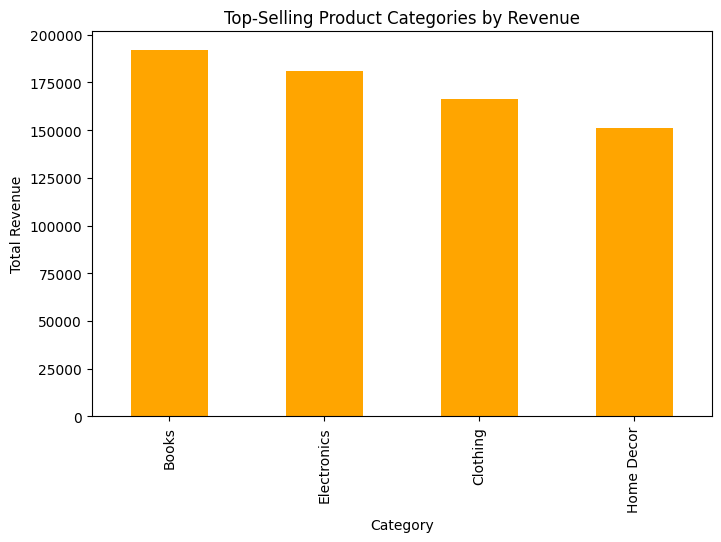

In [9]:
# 4. Top-selling product categories
top_categories = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
top_categories.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Top-Selling Product Categories by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.show()

In [10]:
# 5. Repeat customers analysis
repeat_customers = merged['CustomerID'].value_counts()
repeat_count = (repeat_customers > 1).sum()
print(f"Number of repeat customers: {repeat_count}")


Number of repeat customers: 187


In [11]:
# 6. High-value customers
customer_revenue = merged.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_customers = customer_revenue.head(10)
print("Top 10 Customers by Revenue:")
print(top_customers)


Top 10 Customers by Revenue:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


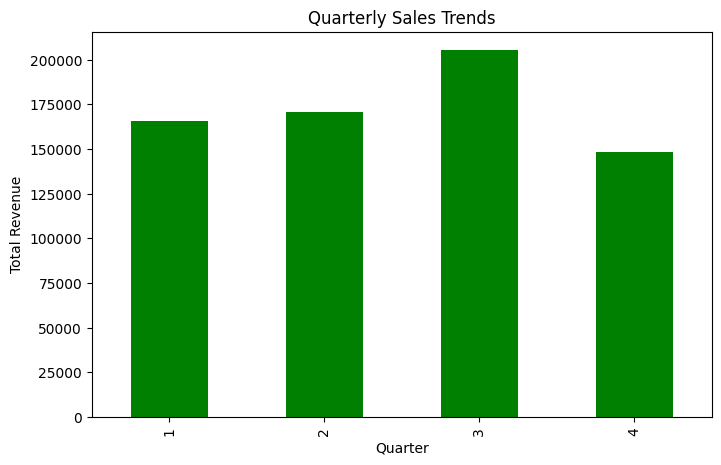

In [12]:
# 7. Seasonal trends (Q1, Q2, Q3, Q4)
merged['Quarter'] = merged['TransactionDate'].dt.quarter
quarterly_sales = merged.groupby('Quarter')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
quarterly_sales.plot(kind='bar', color='green')
plt.title('Quarterly Sales Trends')
plt.ylabel('Total Revenue')
plt.xlabel('Quarter')
plt.show()